# IBM Applied Data Science Capstone

### Final Capstone Project - Peer Graded

## Opening a new Restaurant in Maharashtra, India



**Some Factual Information on Maharashtra(from Wiki)** 

_With my basic understanding, India is divided into many states. Maharashtra is one of the states among those. It is located in the western part of the country. It is the second-most populous state and third-largest state by area. Spread over 307,713 km2 (118,809 sq mi).It is also the world's second-most populous subnational entity. It has over 112 million inhabitants and its capital, Mumbai, has a population around 18.4 million making it the most populous urban area in India. Nagpur hosts the winter session of the state legislature. Pune is known as the 'Oxford of the East' due to the presence of several well-known educational institutions. Nashik is known as the 'Wine Capital of India' as it has the largest number of wineries and vineyards in the country. Maharashtra is the most industrialised state in India while state capital Mumbai is India's financial and commercial capital. The state continues to be the single largest contributor to the national economy with a share of 15% in the country's gross domestic product (GDP). The economy of Maharashtra is the largest in India, with a gross state domestic product (GSDP) of ₹28.78 lakh crore and has the country's 13th-highest GSDP per capita of ₹208,000 . Maharashtra has the 15th highest ranking among Indian states in human development index._

Source : <https://en.wikipedia.org/wiki/Maharashtra> 

_India is divided into **States**. Each State is divided into **Districts** and each District is divided into **Talukas**

### Workflow of this Capstone Project:-

* Build a dataframe of Districts and Talukas in Maharashtra, India by web scraping the data from Wikipedia page. _Source : <https://en.wikipedia.org/wiki/List_of_talukas_of_Maharashtra>_

* Get the geographical coordinates of the Talukas using **geocoder**

* Obtain the venue data for the Talukas from **Foursquare API**

* Use the **K-Means clustering** to cluster the data into k clusters.

* Select the best cluster to open a new **Restaurant**

## Step 1: Import the necessary libraries

In [109]:
# library to handle data in a vectorized manner
import numpy as np

# library for data analsysis
import pandas as pd

# library for data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# convert an address into latitude and longitude values
from geopy.geocoders import Nominatim

# library to handle requests
import requests 

# to get coordinates
import geocoder

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

# map rendering library
import folium

print("Imported!")

Imported!


## Step 2: Scraping data from the Wikipedia page into a Pandas DataFrame

In [23]:
MH_Dist_Tal = pd.read_html("https://en.wikipedia.org/wiki/List_of_talukas_of_Maharashtra")

In [24]:
MH_Dist_Tal_df = MH_Dist_Tal[0]
MH_Dist_Tal_df.head()

,District,District Subdivision,Taluka,Unnamed: 3
0,Sindhudurg district,Kankavli 416602,Kankavli,NaN
1,NaN,NaN,Vaibhavwadi 416810,NaN
2,NaN,NaN,Devgad 416613,NaN
3,NaN,NaN,Malwan 416606,NaN
4,NaN,Sawantwadi 416510,Sawantwadi,NaN


In [25]:
MH_Dist_Tal_df.drop(['District Subdivision','Unnamed: 3'],axis=1,inplace=True)
MH_Dist_Tal_df.head(10)

,District,Taluka
0,Sindhudurg district,Kankavli
1,NaN,Vaibhavwadi 416810
2,NaN,Devgad 416613
3,NaN,Malwan 416606
4,NaN,Sawantwadi
5,NaN,Kudal 416520
6,NaN,Vengurla 416512
7,NaN,Dodamarg 416512 (Kasal)
8,Ratnagiri district,Ratnagiri
9,NaN,Sangameshwar 415611 (Deorukh)


In [26]:
MH_Dist_Tal_df=MH_Dist_Tal_df.astype(str)

In [27]:
for i,_ in enumerate(MH_Dist_Tal_df['District']):
    if MH_Dist_Tal_df['District'][i+1]=='nan':
        MH_Dist_Tal_df['District'][i+1] = _
    if i==356:
        break
MH_Dist_Tal_df.head(10)

,District,Taluka
0,Sindhudurg district,Kankavli
1,Sindhudurg district,Vaibhavwadi 416810
2,Sindhudurg district,Devgad 416613
3,Sindhudurg district,Malwan 416606
4,Sindhudurg district,Sawantwadi
5,Sindhudurg district,Kudal 416520
6,Sindhudurg district,Vengurla 416512
7,Sindhudurg district,Dodamarg 416512 (Kasal)
8,Ratnagiri district,Ratnagiri
9,Ratnagiri district,Sangameshwar 415611 (Deorukh)


## Step 3: Get the Latitude and Longitude Values of the Talukas

In [28]:
MH_Dist_Tal_df.shape


(358, 2)

In [29]:
Latitude = []
Longitude = []
lat_lng_coords = None
for Taluka,District in zip(MH_Dist_Tal_df.Taluka,MH_Dist_Tal_df.District):  
    lat_lng_coords = None
    g = geocoder.arcgis('{}, {}, Maharashtra, India'.format(Taluka,District))
    lat_lng_coords = g.latlng
    Latitude.append(lat_lng_coords[0])
    Longitude.append(lat_lng_coords[1])
print('Done!')

Done!


In [30]:
MH_latlng_df = MH_Dist_Tal_df
MH_latlng_df['Latitude'] = Latitude
MH_latlng_df['Longitude'] = Longitude

In [31]:
MH_latlng_df.head(10)

,District,Taluka,Latitude,Longitude
0,Sindhudurg district,Kankavli,16.569380,73.668790
1,Sindhudurg district,Vaibhavwadi 416810,16.505630,73.768000
2,Sindhudurg district,Devgad 416613,16.381198,73.394170
3,Sindhudurg district,Malwan 416606,16.104241,73.502825
4,Sindhudurg district,Sawantwadi,15.903190,73.823350
5,Sindhudurg district,Kudal 416520,16.016940,73.678220
6,Sindhudurg district,Vengurla 416512,15.852100,73.632210
7,Sindhudurg district,Dodamarg 416512 (Kasal),15.748480,74.042510
8,Ratnagiri district,Ratnagiri,17.079650,73.400640
9,Ratnagiri district,Sangameshwar 415611 (Deorukh),17.188715,73.512550


In [32]:
MH_latlng_df.to_csv("maharashtra.csv", index=False)

In [34]:
# get the coordinates of Maharashtra
address = 'Maharashtra, India'

geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Maharashtra, India are : {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Maharashtra, India are : 19.531932, 76.0554568.


In [35]:
MH_df = MH_latlng_df

## Step 4: Creating a map of Maharashtra, India with Talkuas superimposed on it

In [36]:
# create map of Toronto using latitude and longitude values
map_mh = folium.Map(location=[latitude, longitude], zoom_start=6)

# add markers to map
for lat, lng, Taluka, District in zip(MH_df['Latitude'],
                                      MH_df['Longitude'],
                                      MH_df['Taluka'],
                                      MH_df['District']):
    label = '{},{}'.format(Taluka,District)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_mh)  
    
map_mh

In [37]:
map_mh.save('map_mh.html')

## Step 5: Use the Foursquare API to explore the Talukas

In [38]:
# define Foursquare Credentials and Version

# Foursquare ID
CLIENT_ID = '0ZHCHPCDSDKTLEMQ5TOOOMLYMVGIH22EHM2SUJEDDKJNVT5T' 

# Foursquare Secret
CLIENT_SECRET = 'DLJWZJKBITFTDRGURCGG4I5OOJKFSZQSAUTYEZQ2ZE3G0K3K' 

# Foursquare API version
VERSION = '20180605' 

# Foursquare Access Token
ACCESS_TOKEN = '33NW0WGLSAHLEM011BOST3WKE2WN342TMO02EUHHFTWESBXX'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0ZHCHPCDSDKTLEMQ5TOOOMLYMVGIH22EHM2SUJEDDKJNVT5T
CLIENT_SECRET:DLJWZJKBITFTDRGURCGG4I5OOJKFSZQSAUTYEZQ2ZE3G0K3K


### Now, let's get the top 100 venues that are within a radius of 3000 meters.

In [42]:
radius = 3000
LIMIT = 100

venues = []

for lat, long, Taluka, District in zip(MH_df['Latitude'],
                                       MH_df['Longitude'],
                                       MH_df['Taluka'],
                                       MH_df['District']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&oauth_token={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        ACCESS_TOKEN,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            Taluka,
            District,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [43]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Taluka' , 'District' , 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(1432, 8)


,Taluka,District,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,Vaibhavwadi 416810,Sindhudurg district,16.505630,73.76800,Vaibhavwadi Market,16.497072,73.745789,Flea Market
1,Vaibhavwadi 416810,Sindhudurg district,16.505630,73.76800,My Idea Store,16.495100,73.746600,Mobile Phone Shop
2,Devgad 416613,Sindhudurg district,16.381198,73.39417,Hotel Vasant Vijay,16.381527,73.390335,Indian Restaurant
3,Devgad 416613,Sindhudurg district,16.381198,73.39417,SpiceJet check-in counter,16.386469,73.391665,Airport
4,Devgad 416613,Sindhudurg district,16.381198,73.39417,Saisidhi Snacks Corner,16.375364,73.391937,Food Court


In [44]:
venues_df.groupby(["Taluka"]).count()

,District,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Taluka,,,,,,,
Achalpur 444806,2,2,2,2,2,2,2
Aheri 442705,2,2,2,2,2,2,2
Ahmedpur 413515,4,4,4,4,4,4,4
Ajra 416505,2,2,2,2,2,2,2
Akkalkot 413216,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...
Walwa (Islampur) 416313,10,10,10,10,10,10,10
Washi 413503,1,1,1,1,1,1,1
Washim 444505,1,1,1,1,1,1,1


In [53]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))


There are 169 uniques categories.


In [54]:
# print out the list of categories
venues_df['VenueCategory'].unique()

array(['Flea Market', 'Mobile Phone Shop', 'Indian Restaurant', 'Airport',
       'Food Court', 'Hotel', 'Bus Station', 'Harbor / Marina',
       'Historic Site', 'Lighthouse', 'Beach', 'Motel',
       'Seafood Restaurant', 'Lake', 'Ice Cream Shop', 'Train Station',
       'Rest Area', 'Juice Bar', 'Snack Place', 'Restaurant',
       'Breakfast Spot', 'Asian Restaurant', 'Grocery Store',
       'Tourist Information Center', 'Castle', 'Trail', 'Scenic Lookout',
       'Dhaba', 'Electronics Store', 'City', 'Diner', 'Coffee Shop',
       'Café', 'Art Gallery', 'Boutique', 'Dessert Shop', 'Gift Shop',
       'Bakery', 'Parsi Restaurant', 'Fast Food Restaurant',
       'History Museum', 'Nightclub', 'Chinese Restaurant', 'Bar', 'Pub',
       'Pizza Place', 'Japanese Restaurant', 'Park', "Men's Store",
       'Lounge', 'New American Restaurant', 'Brewery',
       'Gym / Fitness Center', 'Cricket Ground', 'Cocktail Bar',
       'Deli / Bodega', 'Monument / Landmark', 'Clothing Store',
       

In [55]:
# check if the results contain "Restaurant"
"Restaurant" in venues_df['VenueCategory'].unique()

True

## Step 6: To analyze each Taluka using OneHot Coding

In [56]:
# one hot encoding
mh_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add Taluka column back to dataframe
mh_onehot['Taluka'] = venues_df['Taluka'] 

# move Taluka column to the first column
fixed_columns = [mh_onehot.columns[-1]] + list(mh_onehot.columns[:-1])
mh_onehot = mh_onehot[fixed_columns]

print(mh_onehot.shape)
mh_onehot.head()

(1432, 170)


,Taluka,ATM,Accessories Store,Airport,Airport Lounge,Airport Service,American Restaurant,Andhra Restaurant,Antique Shop,Arcade,...,Theater,Theme Park,Toll Plaza,Tourist Information Center,Town,Trail,Train Station,Vacation Rental,Vegetarian / Vegan Restaurant,Waterfront
0,Vaibhavwadi 416810,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Vaibhavwadi 416810,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devgad 416613,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devgad 416613,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Devgad 416613,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Grouping the rows by calculating the mean of the frequency of occurence of each category

In [60]:
mh_grouped = mh_onehot.groupby(["Taluka"]).mean().reset_index()


mh_grouped = mh_grouped[:207]
print(mh_grouped.shape)

(207, 170)


In [61]:
mh_grouped

,Taluka,ATM,Accessories Store,Airport,Airport Lounge,Airport Service,American Restaurant,Andhra Restaurant,Antique Shop,Arcade,...,Theater,Theme Park,Toll Plaza,Tourist Information Center,Town,Trail,Train Station,Vacation Rental,Vegetarian / Vegan Restaurant,Waterfront
0,Achalpur 444806,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aheri 442705,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Ahmedpur 413515,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Ajra 416505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Akkalkot 413216,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Wai 412803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
203,Walwa (Islampur) 416313,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204,Washi 413503,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
205,Washim 444505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Create a new DataFrame for Restaurants and Talukas data only

In [62]:
mh_Restaurant = mh_grouped[["Taluka","Restaurant"]]

In [63]:
mh_Restaurant.head()

,Taluka,Restaurant
0,Achalpur 444806,0.0
1,Aheri 442705,0.0
2,Ahmedpur 413515,0.0
3,Ajra 416505,0.0
4,Akkalkot 413216,0.0


## Step 7: Clustering Talukas using K-Means Clustering

In [64]:
# set number of clusters
kclusters = 5

mh_clustering =mh_Restaurant.drop(["Taluka"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mh_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [65]:
# create a new dataframe that includes the
#     cluster as well as the top 10 venues for each Taluka.

mh_merged = mh_Restaurant.copy()


# add clustering labels

mh_merged["Cluster Labels"] = kmeans.labels_

In [66]:
mh_merged.rename(columns={"Taluka": "Taluka"}, inplace=True)
mh_merged.head()

,Taluka,Restaurant,Cluster Labels
0,Achalpur 444806,0.0,0
1,Aheri 442705,0.0,0
2,Ahmedpur 413515,0.0,0
3,Ajra 416505,0.0,0
4,Akkalkot 413216,0.0,0


In [67]:
# merge mh_grouped with mh_data to add latitude/longitude for each neighborhood
mh_merged = mh_merged.join(MH_df.set_index("Taluka"), on="Taluka")

print(mh_merged.shape)
mh_merged.head() # check the last columns!

(208, 6)


,Taluka,Restaurant,Cluster Labels,District,Latitude,Longitude
0,Achalpur 444806,0.0,0,Amravati district,21.255120,77.511810
1,Aheri 442705,0.0,0,Gadchiroli district,19.430201,80.018660
2,Ahmedpur 413515,0.0,0,Latur district,18.705610,76.938380
3,Ajra 416505,0.0,0,Kolhapur district,16.105090,74.167778
4,Akkalkot 413216,0.0,0,Solapur district,17.521920,76.197980


In [68]:
# sort the results by Cluster Labels
print(mh_merged.shape)
mh_merged.sort_values(["Cluster Labels"], inplace=True)
mh_merged

(208, 6)


,Taluka,Restaurant,Cluster Labels,District,Latitude,Longitude
0,Achalpur 444806,0.000000,0,Amravati district,21.255120,77.511810
129,Murud 413510,0.000000,0,Raigad district,18.250000,73.433330
130,Nagar 414001,0.000000,0,Ahmednagar district,19.074140,74.726940
131,Nagpur (Rural),0.000000,0,Nagpur district,20.820700,78.959180
133,Naigaon (Khairgaon) 441303,0.000000,0,Nanded district,18.813840,77.517700
...,...,...,...,...,...,...
29,Bhatukali 444602,0.090909,3,Amravati district,20.940442,77.747168
155,Purandhar (Saswad) 412301,0.111111,3,Pune district,18.350037,74.029283
65,Guhagar 415703,0.142857,3,Ratnagiri district,17.485900,73.196610
197,Vasai 401208,0.090909,3,Palghar district,19.407860,72.854950


### Let's visualize the resulting clusters

Superimposing the clusters on the map with each cluster in a different color

In [69]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=6)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mh_merged['Latitude'],
                                  mh_merged['Longitude'],
                                  mh_merged['Taluka'],
                                  mh_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [70]:
# save the map as HTML file
map_clusters.save('map_clusters.html')

## Step 8: Examine the clusters:- 

### Cluster Label : 0

In [71]:
mh_merged.loc[mh_merged['Cluster Labels'] == 0]

,Taluka,Restaurant,Cluster Labels,District,Latitude,Longitude
0,Achalpur 444806,0.0,0,Amravati district,21.255120,77.511810
129,Murud 413510,0.0,0,Raigad district,18.250000,73.433330
130,Nagar 414001,0.0,0,Ahmednagar district,19.074140,74.726940
131,Nagpur (Rural),0.0,0,Nagpur district,20.820700,78.959180
133,Naigaon (Khairgaon) 441303,0.0,0,Nanded district,18.813840,77.517700
...,...,...,...,...,...,...
90,Kannad 431103,0.0,0,Aurangabad district,20.271920,75.123300
66,Hadgaon 431717,0.0,0,Nanded district,18.552840,77.572378
67,Hatkanangale 416109,0.0,0,Kolhapur district,16.752310,74.277330
61,Georai 431127,0.0,0,Beed district,19.267490,75.745510


###  Cluster Label : 1

In [72]:
mh_merged.loc[mh_merged['Cluster Labels'] == 1]

,Taluka,Restaurant,Cluster Labels,District,Latitude,Longitude
196,Vaijapur 423701,0.250000,1,Aurangabad district,19.92509,74.72936
76,Jamkhed 413201,0.250000,1,Ahmednagar district,18.73425,75.31078
71,Hingna 441110,0.250000,1,Nagpur district,21.10039,78.98157
45,Dahanu 401602,0.285714,1,Palghar district,19.98848,72.74471
62,Ghansawangi 431209,0.250000,1,Jalna district,19.52122,75.98533


###  Cluster Label : 2

In [73]:
mh_merged.loc[mh_merged['Cluster Labels'] == 2]

,Taluka,Restaurant,Cluster Labels,District,Latitude,Longitude
15,Andheri 400069,0.030000,2,Mumbai Suburban District,19.10393,72.86698
59,Gaganbawada,0.047619,2,Kolhapur district,21.17497,79.07479
101,Khandala 410301,0.037037,2,Satara district,18.76027,73.38759
140,Osmanabad 413501,0.052632,2,Osmanabad,18.19431,76.04478
113,Mahabaleshwar 412806,0.058824,2,Satara district,17.93210,73.66779
206,Yavatmal 445500,0.066667,2,Yavatmal district,20.38967,78.12734
132,Nagpur (Urban),0.027027,2,Nagpur district,21.13677,79.08227
35,Borivali 400066,0.065574,2,Mumbai Suburban District,19.23496,72.85508
108,Kurla 400070 (Mulund) 400081,0.044444,2,Mumbai Suburban District,19.17437,72.95068
115,Majalgaon 431131,0.066667,2,Beed district,18.96836,72.84174


###  Cluster Label : 3

In [77]:
mh_merged.loc[mh_merged['Cluster Labels'] == 3]

,Taluka,Restaurant,Cluster Labels,District,Latitude,Longitude
29,Bhatukali 444602,0.090909,3,Amravati district,20.940442,77.747168
155,Purandhar (Saswad) 412301,0.111111,3,Pune district,18.350037,74.029283
65,Guhagar 415703,0.142857,3,Ratnagiri district,17.485900,73.196610
197,Vasai 401208,0.090909,3,Palghar district,19.407860,72.854950


###  Cluster Label : 4

In [75]:
mh_merged.loc[mh_merged['Cluster Labels'] == 4]

,Taluka,Restaurant,Cluster Labels,District,Latitude,Longitude
162,Sangameshwar 415611 (Deorukh),0.333333,4,Ratnagiri district,17.188715,73.51255


### Visualising the population based on District

**Source of table : <https://www.census2011.co.in/census/state/districtlist/maharashtra.html>**

In [121]:
# Fetching a table from the source

MH_dist = pd.read_html("https://www.census2011.co.in/census/state/districtlist/maharashtra.html")

In [125]:
MH_dist = MH_dist[0][['District','Population']]

In [133]:
MH_dist

,District,Population
0,Thane,11060148
1,Pune,9429408
2,Mumbai Suburban,9356962
3,Nashik,6107187
4,Nagpur,4653570
5,Ahmadnagar,4543159
6,Solapur,4317756
7,(adsbygoogle = window.adsbygoogle || []).push(...,(adsbygoogle = window.adsbygoogle || []).push(...
8,Jalgaon,4229917
9,Kolhapur,3876001


In [137]:
# Dropping irrelevant data from the DataFrame

MH_dist_df = MH_dist.drop([MH_dist.index[7] , MH_dist.index[15]])

In [139]:
#Displaying the Districtr wise Population Dataframe of Maharashtra State

MH_dist_df

,District,Population
0,Thane,11060148
1,Pune,9429408
2,Mumbai Suburban,9356962
3,Nashik,6107187
4,Nagpur,4653570
5,Ahmadnagar,4543159
6,Solapur,4317756
9,Kolhapur,3876001
10,Aurangabad,3701282
11,Nanded,3361292


In [149]:
# Fetching the Top 5 Districts sorted by Population

MH_top5 = MH_dist_df[0:5]

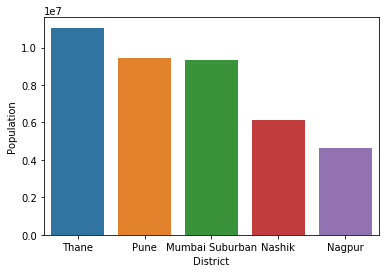

In [146]:
# Visualizing the Districts on a barplot using the seaborn library 

sns.barplot(y=MH_top5['Population'],x=MH_top5['District'])

### The top 5 districts with largest populations are:-

In [147]:
MH_top5

,District,Population
0,Thane,11060148
1,Pune,9429408
2,Mumbai Suburban,9356962
3,Nashik,6107187
4,Nagpur,4653570


## Conclusion

**From the above we can see that Cluster Label 0 has the least(pretty much zero) number of restaurants. This is a great opportunity for the business investors who want to open a restaurant in the Maharashtra State as in Cluster Label 0 there is no Competition.**

**Cluster 1 and Cluster 4 have very high competition. Cluster 4 has a single competitor but the mean is quite high suggesting that the competition will be hard.** 

**Cluster 2 and Cluster 3 have fair number of restaurants but the mean is not as high. So there is Competition but the Competition is not much resistant.**



### It would be a good idea to start a Restaurant in Cluster 0 

#### A better decision would be choose from Cluster 0 and belonging to one of the

#### top 5 population wise sorted Districts namely Thane, Pune, Mumbai Suburban, 

#### Nashik, Nagpur	